<a href="https://colab.research.google.com/github/bilik49/statistical_analysis/blob/main/pearson_chi_sq_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

### Проверим гипотезу согласия с нормальным законом эмпирического закона распределения промоделированной выборки с заданными параметрами.

Моделируем нормальную случайную величину:

In [246]:
N = 300
mean = 0
var = 1

normal = np.random.normal(mean,var,N)

Посмотрим на гистограмму распределения.

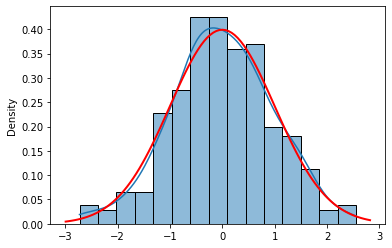

In [247]:
ax = sns.histplot(normal, kde = True, stat='density')
x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc = mean, scale = var)
ax.plot(x_pdf,y_pdf,'r', lw=2)

По формуле Стерджесса разобъем на k интервалов:

In [248]:
k = 1 + np.floor(3.322 * np.log10(N)).astype(int)
max = np.max(normal)
min = np.min(normal)
h = (max - min) / k

Получилось

In [249]:
k

9

Вычислим наблюдаемые частоты:

In [250]:
freq_obs = np.array(pd.Series(normal).value_counts(bins = k, sort = False))
freq_obs

array([ 5, 11, 29, 66, 68, 62, 33, 21,  5])

Вычислим теоретические частоты:

In [251]:
p = st.norm.cdf(min + np.arange(2, k) * h, loc = mean, scale = var) - st.norm.cdf(min + np.arange(1,k-1) * h, loc = mean, scale = var)
p = np.concatenate(([st.norm.cdf(min + h, loc = mean, scale = var)], p, [1 - st.norm.cdf(min + (k-1) * h, loc = mean, scale = var)]))
freq_exp = p * N
freq_exp

array([ 4.84410438, 13.20180335, 32.04357969, 55.61742563, 69.04333989,
       61.3063386 , 38.93536199, 17.68368492,  7.32436156])

Посчитаем статистику $\chi^2$:

In [252]:
chi_sq = sum((freq_obs - freq_exp) ** 2 / freq_exp)
chi_sq

4.887488987707439

Вычислим pvalue:

In [253]:
pvalue = 1 - st.chi2.cdf(chi_sq, k-1)
pvalue

0.7695310310201708

pvalue > 0.05. Следовательно, принимаем нулевую гипотезу. Таким образом, промоделированная случайная величина имеет нормальное распределение.

Через пакет scipy:

In [254]:
st.chisquare(freq_obs, freq_exp)

Power_divergenceResult(statistic=4.887488987707439, pvalue=0.7695310310201708)